In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv("../archive/DATA/fake_reg.csv")

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


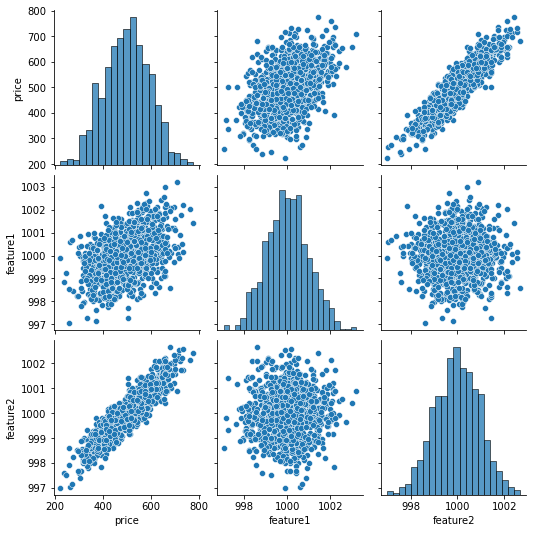

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1', 'feature2']].values

In [7]:
y = df['price'].values

In [8]:
# X

In [9]:
# y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(700, 2)

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# help(MinMaxScaler)

In [15]:
scaler = MinMaxScaler()

In [16]:
# fit only the data from training set to avoid accessing test set
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
# X_train.min()
# X_train.max()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# help(Dense)

In [22]:
model = Sequential([Dense(4, activation='relu'),
                    Dense(2, activation='relu'),
                    Dense(1)])

In [23]:
# better way
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [24]:
# better way
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [25]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256416.2031
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256158.1250
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 255874.3125
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 255543.6562
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255169.5312
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 254745.7188
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 254274.6094
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 253753.6875
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 253173.8438
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 252521.9219
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 251799.1719
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [26]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

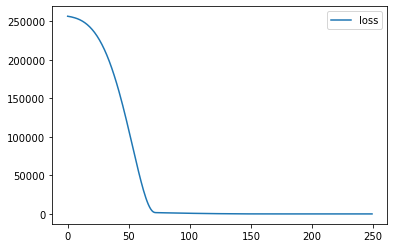

In [27]:
loss_df.plot()

In [28]:
# evaluation
model.evaluate(X_test, y_test, verbose=0)

28.351360321044922

In [29]:
model.evaluate(X_train, y_train, verbose=0)

25.67766761779785

In [30]:
test_predictions = model.predict(X_test)

In [31]:
# test_predictions

In [32]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [33]:
# test_predictions

In [34]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [35]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [36]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [37]:
pred_df

,Test True Y,Model Predictions
0,402.296319,406.676392
1,624.156198,625.653259
2,582.455066,594.149902
3,578.588606,574.148254
4,371.224104,367.834839
...,...,...
295,525.704657,530.826233
296,502.909473,517.020081
297,612.727910,611.723511
298,417.569725,418.399109


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

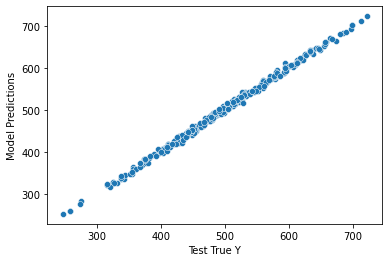

In [38]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [39]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.325776418617885

In [42]:
mse = mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

In [43]:
# root mean squared error
np.sqrt(mse)

5.324600690230269

In [44]:
# predicting on a new gemstone
new_gem = [[998, 1000]]

In [46]:
new_gem = scaler.transform(new_gem)

In [47]:
model.predict(new_gem)

array([[421.08447]], dtype=float32)

In [49]:
# save the model state
from tensorflow.keras.models import load_model

In [50]:
model.save('my_gem_model.h5')

In [51]:
later_model = load_model('my_gem_model.h5')

In [53]:
later_model.predict(new_gem)

array([[421.08447]], dtype=float32)